# Quinten Crum
# Homework #2
# Math 450
# Fall 2022

## Problem #7
### A)


In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [10]:

def ai_func(ai, x, i):
    if(i == 0):
        return ai
    else:
        ai_1 = ai + ((x*math.cos(ai)+x)/10.0)
        return ai_func(ai_1,x,i-1)

def g_x_func(x):
    return ai_func(1,x,10) #a0 = 1, x=x, i=10


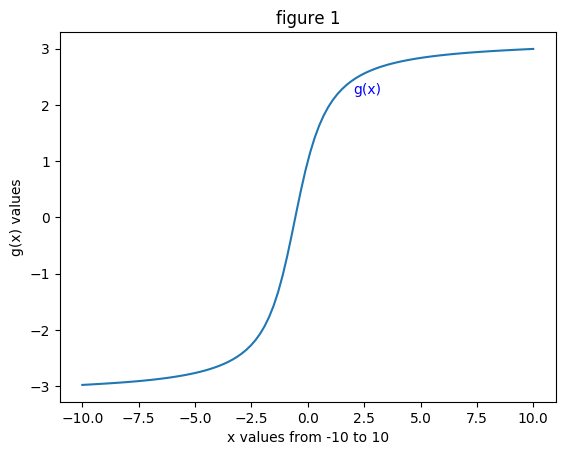

In [11]:

x_vec = np.linspace(-10,10,100)
y_vec = np.zeros(len(x_vec))

for i in range(len(x_vec)):
    y_vec[i] = g_x_func(x_vec[i])
    

plt.plot(x_vec,y_vec)
plt.xlabel('x values from -10 to 10')
plt.ylabel('g(x) values')
plt.title('figure 1')
plt.text(2,2.2,'g(x)',color='blue')
plt.show()


### B)

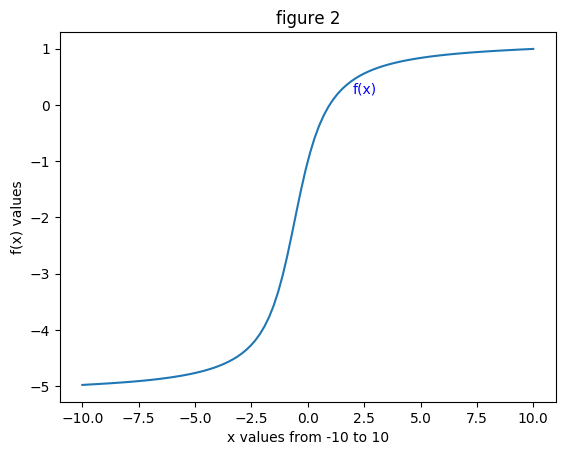

In [12]:
x_vec = np.linspace(-10,10,100)
y_vec = np.zeros(len(x_vec))

for i in range(len(x_vec)):
    y_vec[i] = g_x_func(x_vec[i]) - 2
    

plt.plot(x_vec,y_vec)
plt.xlabel('x values from -10 to 10')
plt.ylabel('f(x) values')
plt.title('figure 2')
plt.text(2,0.2,'f(x)',color='blue')
plt.show()

Newton's method may be ill suited for this new task of finding where f(x)=0 because Newton's method requires us to have a starting point within a ceratin neighborhood. As we can see in figure 2 the slopes around positive and negative 7.5-10.0 if we were do use these areas as our starting points we would actually get a value further away from the root of f.

### C)

In [13]:
def f_x_func(x):
    return g_x_func(x)-2

def secantMethod(x_vec,f_vec,i,digits):
    if (i >= len(x_vec)) or (abs(x_vec[i-1]-x_vec[i-2])< 10**((-1)*digits)): #checking for _ digits of accuracy
        #print('returning i: '+str(i))
        #print('Returning because of i: '+str(i >= len(x_vec)))
        return x_vec,f_vec,i,digits
    else:
        x_vec[i] = x_vec[i-1] - (((x_vec[i-1] - x_vec[i-2])/(f_vec[i-1] - f_vec[i-2]))*f_vec[i-1])
        f_vec[i] = f_x_func(x_vec[i])
        return secantMethod(x_vec,f_vec,i+1,digits)


In [15]:
iterations = 10 #number of iterations of x
x_vec = np.zeros(iterations,dtype=np.float128)
x_vec[1] = 1    #x0 already zero and this sets x1 to 1
f_vec = np.zeros(iterations,dtype=np.float128)
f_vec[0] = f_x_func(x_vec[0])   #f(x0)
f_vec[1] = f_x_func(x_vec[1])   #f(x1)

digits_9 = secantMethod(x_vec,f_vec,2,9)
digits_6 = secantMethod(x_vec,f_vec,2,6)

print('For 9 digits of accuracy it took '+str(digits_9[2])+' iterations of the secant method and we ended up getting an x value of '+str(digits_9[0][digits_9[2]-1]))

print('For 6 digits of accuracy it took '+str(digits_6[2])+' iterations of the secant method and we ended up getting an x value of '+str(digits_6[0][digits_6[2]-1]))

print()
print('These two values are the same even when we use the 9 digit tolerance.')



For 9 digits of accuracy it took 7 iterations of the secant method and we ended up getting an x value of 0.96366361701790921005
For 6 digits of accuracy it took 7 iterations of the secant method and we ended up getting an x value of 0.96366361701790921005

These two values are the same even when we use the 9 digit tolerance.


### D)

In [91]:
def bisectionMethod(a_vec,b_vec,i):
    if(f_x_func(a_vec[i-1])*f_x_func(b_vec[i-1]) > 0):
        print('Error in a,b values!')
        return a_vec,b_vec,i
    elif i >= len(a_vec):
        print('i too high for vector index')
        return a_vec,b_vec,i
    elif abs(a_vec[i-1]-b_vec[i-1]) < 10**((-1)*6):
        print('Accuracy desired hit!')
        return a_vec,b_vec,i-1
    else:
        c_i = (a_vec[i-1]+b_vec[i-1])/2.0
        f_c = f_x_func(c_i)
        f_a = f_x_func(a_vec[i-1])
        f_b = f_x_func(b_vec[i-1])

        if f_a*f_c < 0:
            a_vec[i] = a_vec[i-1]
            b_vec[i] = c_i
            return bisectionMethod(a_vec,b_vec,i+1)
        elif f_b*f_c < 0:
            b_vec[i] = b_vec[i-1]
            a_vec[i] = c_i
            return bisectionMethod(a_vec,b_vec,i+1)
        else:
            print('both inequalities are false')
            return a_vec,b_vec,i





In [101]:
iterations = 100

a_vec = np.zeros(iterations)
b_vec = np.zeros(iterations)
a_vec[0] = 0
b_vec[0] = 1



ans = bisectionMethod(a_vec,b_vec,1)

print('For 6 digits of accuracy it took '+str(ans[2])+' iterations of the secant method and we ended up getting an x value of '+str(ans[0][ans[2]-1]))



print()
print()
print('Comparing the two answers:')
print()
print('The value we got from the secant method was:    '+str(digits_6[0][digits_6[2]-1]))
print('The value we got from the bisection method was: '+str(ans[0][ans[2]-1]))
print('The difference between the two is: '+str(abs(digits_6[0][digits_6[2]-1]) - ans[0][ans[2]-1])+' meaning that the two answers are similar to the 6-digit accuracy we were looking for.')
print()
print('The secant method took '+str(digits_6[2])+' iterations to get to the desired level of accuracy.')
print('The bisection method took '+str(ans[2])+' iterations to get the the desired level of accuracy.')
print('The secant method we expect to be faster than the bisection method as we can see. This is because as we saw in class the bisection method is only converges linearly while the secant method converges super linearly.')

Accuracy desired hit!
For 6 digits of accuracy it took 20 iterations of the secant method and we ended up getting an x value of 0.9636631011962891


Comparing the two answers:

The value we got from the secant method was:    0.96366361701790921005
The value we got from the bisection method was: 0.9636631011962891
The difference between the two is: 5.158216201475458035e-07 meaning that the two answers are similar to the 6-digit accuracy we were looking for.

The secant method took 7 iterations to get to the desired level of accuracy.
The bisection method took 20 iterations to get the the desired level of accuracy.
The secant method we expect to be faster than the bisection method as we can see. This is because as we saw in class the bisection method is only converges linearly while the secant method converges super linearly.
